In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fields = ["username","date","retweets","favorites","text","geo","mentions","hashtags","id","permalink"]
volume_data = pd.read_csv("raw_data/mix/Per Period/2018_part1.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/mix/Per Period/2018_part1.csv'

In [ ]:
data = volume_data
data = data.sort_values(by='date')
data = data[["date"]]

In [ ]:
data = data.set_index("date")
data.index = pd.to_datetime(data.index,format='%d/%m/%Y %H:%M')

In [ ]:
grouped_data = data.groupby(pd.Grouper(freq="60Min")).size().reset_index(name='tweet_vol')

In [ ]:
plt.close()
grouped_data.plot(x='date')
plt.show()



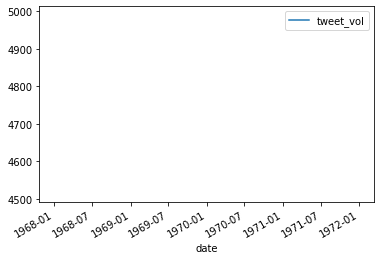

../Data/2018tweets/grouped/10Min\03 2018_en10Min.csv
(4752, 2)


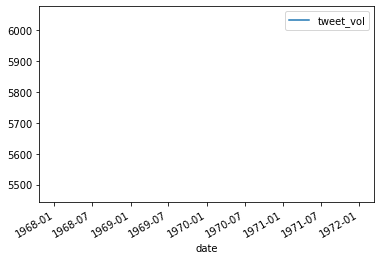

../Data/2018tweets/grouped/10Min\04 2018_en10Min.csv
(5760, 2)


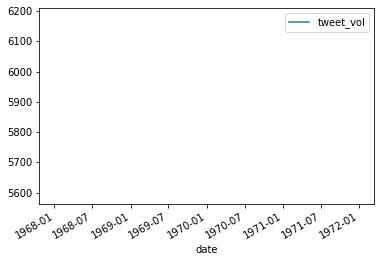

../Data/2018tweets/grouped/10Min\05 2018_en10Min.csv
(5885, 5)


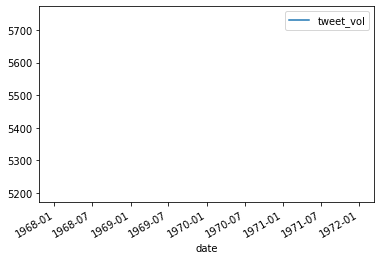

../Data/2018tweets/grouped/10Min\06 2018_en10Min.csv
(5472, 5)


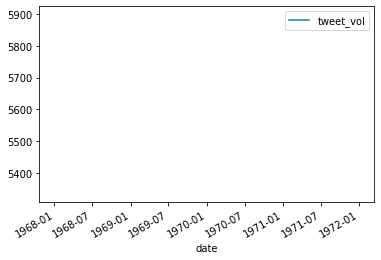

../Data/2018tweets/grouped/10Min\07 2018_en10Min.csv
(5616, 5)


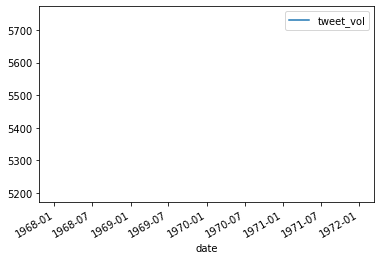

../Data/2018tweets/grouped/10Min\08 2018_en10Min.csv
(5472, 5)


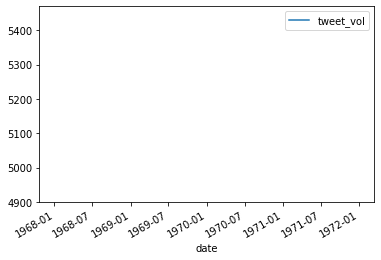

../Data/2018tweets/grouped/10Min\09 2018_en10Min.csv
(5184, 5)


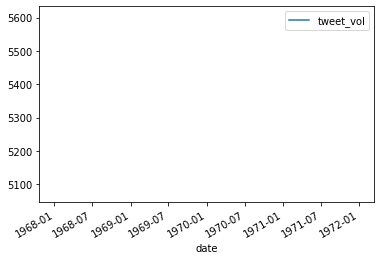

../Data/2018tweets/grouped/10Min\10 2018_en10Min.csv
(5340, 5)


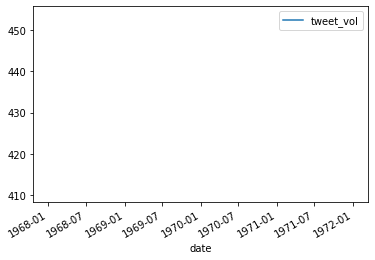

../Data/2018tweets/grouped/10Min\11 2018_en10Min.csv
(432, 5)


In [9]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os

filelist = []
root_path = "../Data/2018tweets/bert"
#root_path = "raw_data/mix/Raw/19/Enero 2019"

for roots, dirs, files in os.walk(root_path):
    for file in files:
        filelist.append(os.path.join(roots, file))

for file_path in filelist:
    try:
        volume_data = pd.read_csv(file_path, sep=";")
    except:
        volume_data = pd.read_csv(file_path, lineterminator="\n")
    volume_data = volume_data.sort_values(by='date')
    # volume_data['weight'] = 1
    try:
        volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M:%S', utc=True)
    except:
        try:
            volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M', utc=True)
        except:
            volume_data['date'] = pd.to_datetime(volume_data['date'], format='%Y-%m-%d %H:%M:%S', utc=True)
    volume_data['date'] = volume_data["date"].dt.tz_localize(None)
    volume_data = volume_data.set_index("date")

    grouped_data = volume_data.groupby(pd.Grouper(freq="10Min")).size().reset_index(name='tweet_vol')
    plt.close()
    grouped_data.plot(x='date')
    plt.show()

    print(file_path)
    print(volume_data.shape)

In [4]:
grouped_data.plot(x='date')
plt.show()


NameError: name 'grouped_data' is not defined

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os
start_date = datetime.datetime(2018, 2, 1, 0, 0, 0, 0, datetime.timezone.utc)
end_date = datetime.datetime(2018, 3, 1, 23, 0, 0, 0, datetime.timezone.utc)

volume_data = pd.read_csv("raw_data/TweetsBTC_16mil/peryear/18.csv", lineterminator="\n")
volume_data = volume_data.sort_values(by='date')

volume_data['date'] = pd.to_datetime(volume_data['date'])

volume_data = volume_data.loc[
        (volume_data['date'] >= start_date) &
        (volume_data['date'] <= end_date)
        ]

try:
    volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M:%S')
except:
    try:
        volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M')
    except:
        volume_data['date'] = pd.to_datetime(volume_data['date'], format='%Y-%m-%d %H:%M:%S')

volume_data = volume_data.set_index("date")

grouped_data = volume_data.groupby(pd.Grouper(freq="10Min")).size().reset_index(name='tweet_vol')
plt.close()
grouped_data.plot(x='date')
plt.show()

In [1]:
import pandas as pd


print("reading tweets_data")
filelist = [
    # "03 2018_en10Min.csv",
    # "04 2018_en10Min.csv,"
    "05 2018_en10Min.csv",
    # "06 2018_en10Min.csv",
    # "07 2018_en10Min.csv",
    # "08 2018_en10Min.csv",
    # "09 2018_en10Min.csv",
    # "10 2018_en10Min.csv",
    # "11 2018_en10Min.csv"
]

root_path = "../Data/2018tweets/grouped/10Min/"

tweets_data = pd.DataFrame()
for file_path in filelist:
    try:
        temp = pd.read_csv(root_path+file_path, lineterminator="\n")
    except:
        temp = pd.read_csv(file_path+file_path, sep=";")

    new_columns = [i.strip() for i in temp.columns]
    temp.columns = new_columns
    tweets_data = tweets_data.append(temp)

tweets_data = tweets_data.dropna()

reading tweets_data


In [2]:
def meanlist(listoflists):
    divider = len(listoflists)
    try:
        summed = listoflists.pop()
        while len(listoflists) > 0:
            summed = [sum(item) for item in zip(summed, listoflists.pop())]
        mean = []
        for number in summed:
            mean.append(number / divider)
        return mean
    except:
        return []


def convert_to_datetime(data_frame, key):
    try:
        data_frame[key] = pd.to_datetime(data_frame[key], format='%d/%m/%Y %H:%M:%S', utc=True)
    except:
        try:
            data_frame[key] = pd.to_datetime(data_frame[key], format='%d/%m/%Y %H:%M', utc=True)
        except:
            data_frame[key] = pd.to_datetime(data_frame[key], format='%Y-%m-%d %H:%M:%S', utc=True)

    return data_frame

In [3]:
data = tweets_data

data = data.sort_values(by='date')
data = convert_to_datetime(data, "date")
data['date'] = data["date"].dt.tz_localize(None)
data = data.set_index("date")

In [20]:
import ast
aggregations = {
    'sent_neg': 'mean',
    'sent_neu': 'mean',
    'sent_pos': 'mean',
    "bert": "sum",
    "count": 'sum'
}

In [4]:
data["sent_neg"] = data["sent_neg"] *  data["count"]

In [5]:
data["sent_neu"] = data["sent_neu"] *  data["count"]

In [6]:
data["sent_pos"] = data["sent_pos"] *  data["count"]

In [ ]:
data["bert"] = data["bert"] *  data["count"]

In [ ]:
grouped_data = data.groupby(pd.Grouper(freq="60Min")).agg(aggregations)

data["sent_neg"] = data["sent_neg"] /  data["count"]
data["sent_neu"] = data["sent_neu"] /  data["count"]
data["sent_pos"] = data["sent_pos"] /  data["count"]
data["bert"] = data["bert"] /  data["count"]

